# Kaggle 신용카드 사기 검출 - 분류 모델링 수행(recall)

# 1, Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/My Drive/ = 구글 드라이브(내 드라이브) 경로

!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# 2, Data Preprocessing

## 1) Unzip 'creditCardFraud.zip'

In [ ]:
# !unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar  9 04:22 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


## 2) 데이터 읽어오기

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
%%time
import pandas as pd

DF = pd.read_csv('creditcard.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Class - 0(정상) / 1(사기)

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
(DF.Class.value_counts()/DF.shape[0])*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
DF.drop('Time', axis=1, inplace=True)
DF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3) Data Set

In [ ]:
X=DF.iloc[:,:-1]
y=DF.iloc[:,-1]
X.shape, y.shape

((284807, 29), (284807,))

## 4) split = 7:3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2045,
                                                    stratify = y)

* Train_Data vs. Test_Date의 1(부정) 비율이 균형

In [ ]:
print('Train Data : ', '\n', (y_train.value_counts()/y_train.shape[0]) * 100)
print('Test Data : ', '\n', (y_test.value_counts()/y_test.shape[0]) * 100)

Train Data :  
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test Data :  
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# 3, 탐색적 데이터 분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.pairplot(hue='Class', data =DF)
# plt.show()

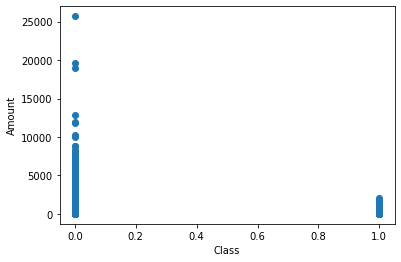

In [ ]:
plt.scatter(DF['Class'] , DF['Amount'])
plt.xlabel("Class")
plt.ylabel('Amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


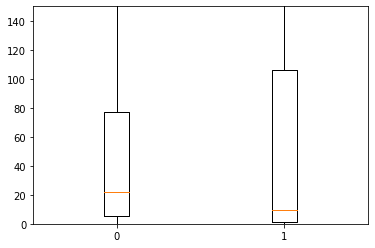

In [ ]:
plt.boxplot([DF[DF.Class == 0].Amount,
             DF[DF.Class == 1].Amount],
            labels = ['0', '1'])
plt.ylim(0,150)
plt.show()

In [ ]:
grouped = DF.groupby(['Class'])
grouped_0 = grouped.get_group(0)
grouped_1 = grouped.get_group(1)

In [ ]:
grouped = DF.groupby(['Class'])
grouped_1 = grouped.get_group(1)
type(grouped_1)

pandas.core.frame.DataFrame

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


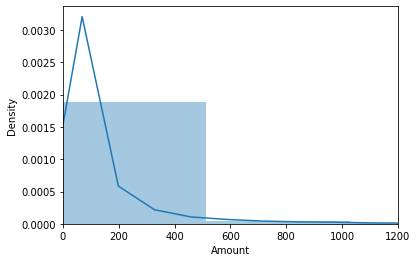

In [ ]:
sns.distplot(grouped_0['Amount'], label='0_Amount')
#plt.ylim(0,150)
plt.xlim(0,1200)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


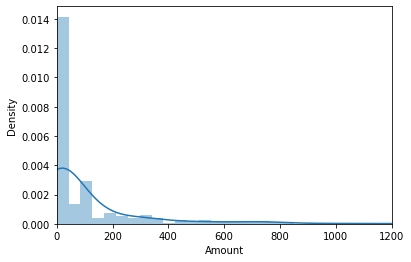

In [ ]:
sns.distplot(grouped_1['Amount'], label='1_Amount')
#plt.ylim(0,150)
plt.xlim(0,1200)
plt.show()

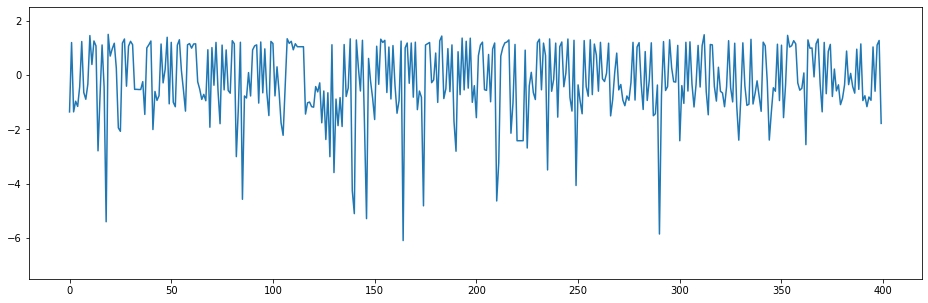

In [ ]:
plt.figure(figsize = (16,5))
plt.plot(DF['V1'][:400])
# plt.plot(DF['V2'][:400], color='red')
# plt.plot(DF['V3'][:400], color='green')
# plt.plot(DF['V4'][:400], color='orange')
plt.ylim(-7.5,2.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


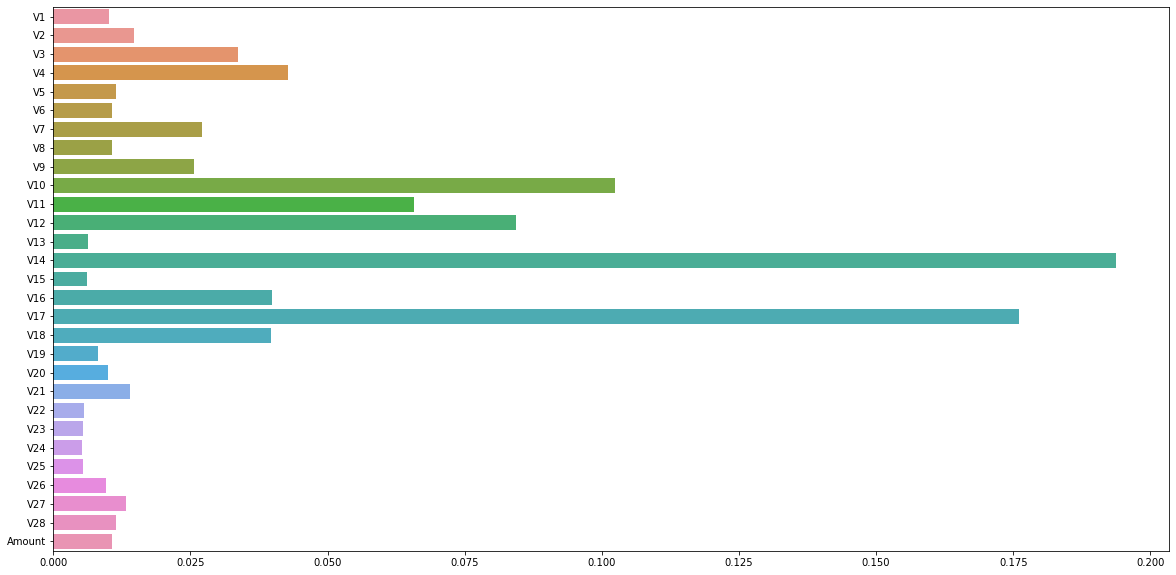

CPU times: user 3min 9s, sys: 228 ms, total: 3min 9s
Wall time: 1min 37s


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 100 , max_features = 4, max_depth = 10 , criterion = 'entropy' , n_jobs = -1 , random_state = 2045)
rfr.fit(X_train , y_train)

rfr.feature_importances_
plt.figure(figsize=(20, 10))
sns.barplot(rfr.feature_importances_ , X_train.columns )
plt.show()

# 4, Random Forest

## 1) 모델링 함수

In [ ]:
def randomForest(model_name, X, y, n_est, mf='auto', md=None,  visualFeature = False):
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2045)

  # model
  model_rf = RandomForestClassifier(n_estimators = n_est, max_features = mf, max_depth =md, criterion = 'entropy', n_jobs= -1, random_state=2045)
  model_rf.fit(X_train, y_train)

  # evaluate
  score_ac = accuracy_score(y_test, model_rf.predict(X_test))
  score_rc = recall_score(y_test, model_rf.predict(X_test), pos_label =1 )

  if visualFeature:
    plt.figure(figsize = (9, 6))
    sns.barplot(model_rf.feature_importances_, X.columns)
    plt.title('Feature Importance')
    plt.show()

  return {'model_id':model_name, 'n_estimators':n_est, 'max_features':mf, 'max_depth':md, 'Accuracy_score':score_ac, 'Recall_score':score_rc}

In [ ]:
DF_res_rf = pd.DataFrame(data=None, columns = ['model_id','n_estimators','max_features','max_depth','Accuracy_score','Recall_score'])

In [ ]:
# DF_res_rf.drop(index=range(0,8), inplace=True)
# DF_res_rf

,model_id,n_estimators,max_features,max_depth,Accuracy_score,Recall_score


## 2) X = Amount

### (1) n_est 조정

In [ ]:
X = DF[['Amount']]
y = DF['Class']

In [ ]:
%%time
a = [50, 100, 300]
index = 1
for n in a:
  model_name = 'RF_1-'+str(index)
  index += 1
  res = randomForest(model_name, X, y, n_est=n)
  print(res)
  DF_res_rf = DF_res_rf.append(res, ignore_index=True)
  DF_res_rf

{'model_id': 'RF_1-1', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9981039991573329, 'Recall_score': 0.013888888888888888}
{'model_id': 'RF_1-2', 'n_estimators': 100, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9980571843217115, 'Recall_score': 0.013888888888888888}
{'model_id': 'RF_1-3', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9980922954484276, 'Recall_score': 0.013888888888888888}
CPU times: user 4min 3s, sys: 622 ms, total: 4min 4s
Wall time: 2min 5s


### (2) max_depth 조정

In [ ]:
%%time
a = [2,3,5,9]
index += 1
for n in a:
  model_name = 'RF_1-'+str(index)
  index += 1
  res = randomForest(model_name, X, y, n_est= 50, md=n)
  print(res)
  DF_res_rf = DF_res_rf.append(res, ignore_index=True)

{'model_id': 'RF_1-5', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': 2, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
{'model_id': 'RF_1-6', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': 3, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
{'model_id': 'RF_1-7', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
{'model_id': 'RF_1-8', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': 9, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
CPU times: user 47.2 s, sys: 291 ms, total: 47.5 s
Wall time: 25.3 s


### recall값 = 0

## 3) X = V10, V14, V17

### (1) n_est 조정

In [ ]:
X = DF[['V10','V14','V17']]
y = DF['Class']

In [ ]:
%%time
a = [50, 100, 300]
index = 1
for n in a:
  model_name = 'RF_3-'+str(index)
  index += 1
  res = randomForest(model_name, X, y, n_est=n)
  print(res)
  DF_res_rf = DF_res_rf.append(res, ignore_index=True)
  DF_res_rf

{'model_id': 'RF_3-1', 'n_estimators': 50, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9994967405170698, 'Recall_score': 0.7708333333333334}
{'model_id': 'RF_3-2', 'n_estimators': 100, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9995084442259752, 'Recall_score': 0.7777777777777778}
{'model_id': 'RF_3-3', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9995201479348805, 'Recall_score': 0.7916666666666666}
CPU times: user 5min 25s, sys: 724 ms, total: 5min 26s
Wall time: 2min 46s


In [ ]:
# %%time
# a = [500,1000]
# index = 1
# for n in a:
#   model_name = 'RF_3-'+str(index)
#   index += 1
#   res = randomForest(model_name, X, y, n_est=n)
#   print(res)
#   DF_res_rf = DF_res_rf.append(res, ignore_index=True)
#   DF_res_rf

{'model_id': 'RF_3-1', 'n_estimators': 500, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9995201479348805, 'Recall_score': 0.7916666666666666}
{'model_id': 'RF_3-2', 'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None, 'Accuracy_score': 0.9995201479348805, 'Recall_score': 0.7916666666666666}
CPU times: user 17min 46s, sys: 2.39 s, total: 17min 48s
Wall time: 9min 4s


### (2) max_depth 조정

In [ ]:
%%time
a = [2,3,5,9]
index += 1
for n in a:
  model_name = 'RF_3-'+str(index)
  index += 1
  res = randomForest(model_name, X, y, n_est= 300, md=n)
  print(res)
  DF_res_rf = DF_res_rf.append(res, ignore_index=True)

{'model_id': 'RF_3-4', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': 2, 'Accuracy_score': 0.9992158515033414, 'Recall_score': 0.625}
{'model_id': 'RF_3-5', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': 3, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7291666666666666}
{'model_id': 'RF_3-6', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': 5, 'Accuracy_score': 0.9994148145547324, 'Recall_score': 0.75}
{'model_id': 'RF_3-7', 'n_estimators': 300, 'max_features': 'auto', 'max_depth': 9, 'Accuracy_score': 0.9995318516437859, 'Recall_score': 0.8055555555555556}
CPU times: user 7min 3s, sys: 1.68 s, total: 7min 5s
Wall time: 3min 38s


### (3) max_features 조정

In [ ]:
%%time
a = [1,2,3]
for n in a:
  model_name = 'RF_3-'+str(index)
  index += 1
  res = randomForest(model_name, X, y, n_est=300, md=9 , mf=n)
  print(res)
  DF_res_rf = DF_res_rf.append(res, ignore_index=True)

{'model_id': 'RF_3-8', 'n_estimators': 300, 'max_features': 1, 'max_depth': 9, 'Accuracy_score': 0.9995318516437859, 'Recall_score': 0.8055555555555556}
{'model_id': 'RF_3-9', 'n_estimators': 300, 'max_features': 2, 'max_depth': 9, 'Accuracy_score': 0.9995201479348805, 'Recall_score': 0.7847222222222222}
{'model_id': 'RF_3-10', 'n_estimators': 300, 'max_features': 3, 'max_depth': 9, 'Accuracy_score': 0.9994967405170698, 'Recall_score': 0.7708333333333334}
CPU times: user 15min 49s, sys: 1.74 s, total: 15min 51s
Wall time: 8min 6s


### (4) recall 비교

In [ ]:
DF_res_rf.sort_values(by='Recall_score', ascending=False)

,model_id,n_estimators,max_features,max_depth,Accuracy_score,Recall_score
16,RF_3-8,300,1,9,0.999532,0.805556
15,RF_3-7,300,auto,9,0.999532,0.805556
9,RF_3-3,300,auto,None,0.999520,0.791667
11,RF_3-2,1000,auto,None,0.999520,0.791667
10,RF_3-1,500,auto,None,0.999520,0.791667
17,RF_3-9,300,2,9,0.999520,0.784722
8,RF_3-2,100,auto,None,0.999508,0.777778
18,RF_3-10,300,3,9,0.999497,0.770833
7,RF_3-1,50,auto,None,0.999497,0.770833
14,RF_3-6,300,auto,5,0.999415,0.750000


### (5) Feature Importances

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


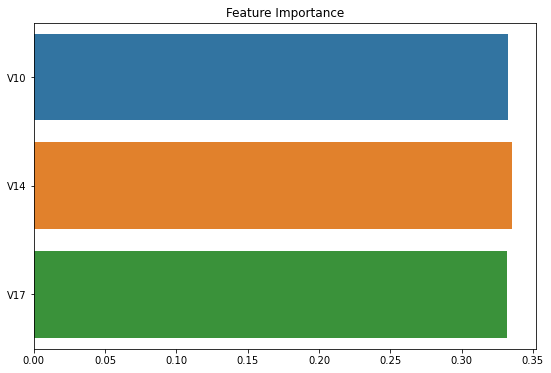

{'model_id': 'RF', 'n_estimators': 300, 'max_features': 1, 'max_depth': 9, 'Accuracy_score': 0.9995318516437859, 'Recall_score': 0.8055555555555556}


In [ ]:
res = randomForest('RF', X, y, n_est=300, mf=1, md=9, visualFeature=True)
print(res)

## 4) GridSearch CV

In [153]:
X = DF[['V10','V14','V17']]
y= DF['Class']

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

Model_gs = RandomForestClassifier()

params = {'n_estimators':[50, 100, 200],
          'max_features': [1,2,3],
          'max_depth': [3, 5, 9],
          'random_state':[2045]}

from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_gs,
                       param_grid = params,
                       scoring = 'recall' ,
                       refit = True,
                       n_jobs = -1)         

grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

In [ ]:
Model_tu = grid_cv.best_estimator_

y_hat = Model_tu.predict(X_test)

accuracy_score = accuracy_score(y_test, y_hat)
recall_score = recall_score(y_test, y_hat)

print('accuracy_score : ', accuracy_score)
print('confusion_matrix : ','\n', confusion_matrix)

# 5, LightGBM Classifier

## 1) 모델링 함수

In [ ]:
def lightGBM(model_name, X, y, n_est, md=None, lr=0.5,  visualFeature = False):
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2045)

  # model
  model_lgbm = LGBMClassifier(n_estimators = n_est, max_depth =md, learning_rate = lr, reg_lambda= 0.2, n_jobs= -1, random_state=2045)
  model_lgbm.fit(X_train, y_train)

  # evaluate
  score_ac = accuracy_score(y_test, model_lgbm.predict(X_test))
  score_rc = recall_score(y_test, model_lgbm.predict(X_test), pos_label =1 )

  if visualFeature:
    plt.figure(figsize = (9, 6))
    sns.barplot(model_lgbm.feature_importances_, X.columns)
    plt.title('Feature Importance')
    plt.show()

  return {'model_id':model_name, 'n_estimators':n_est, 'max_depth':md, 'learning_rage':lr, 'Accuracy_score':score_ac, 'Recall_score':score_rc}

In [ ]:
DF_res_lgbm = pd.DataFrame(data=None, columns = ['model_id','n_estimators','max_features','max_depth','Accuracy_score','Recall_score'])

## 2) X = Amount

### (1) n_est 조정

In [ ]:
X = DF[['Amount']]
y = DF['Class']

In [ ]:
%%time
a = [50, 100, 300]
index = 1
for n in a:
  model_name = 'LGMB_1-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est=n)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)
  DF_res_lgbm

{'model_id': 'LGMB_1-1', 'n_estimators': 50, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
{'model_id': 'LGMB_1-2', 'n_estimators': 100, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
{'model_id': 'LGMB_1-3', 'n_estimators': 300, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9983146659176293, 'Recall_score': 0.0}
CPU times: user 18.8 s, sys: 88.4 ms, total: 18.9 s
Wall time: 9.86 s


### recall 값 = 0

## 3) X = V10, V14, V17

### (1) n_est 조정

In [ ]:
X = DF[['V10','V14','V17']]
y = DF['Class']

In [ ]:
%%time
a = [50, 100, 300]
index = 1
for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est=n)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)
  DF_res_lgbm

{'model_id': 'LGMB_3-1', 'n_estimators': 50, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9992743700478681, 'Recall_score': 0.7708333333333334}
{'model_id': 'LGMB_3-2', 'n_estimators': 100, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9992743700478681, 'Recall_score': 0.7708333333333334}
{'model_id': 'LGMB_3-3', 'n_estimators': 300, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9993094811745842, 'Recall_score': 0.7847222222222222}
CPU times: user 18.7 s, sys: 90.7 ms, total: 18.8 s
Wall time: 9.85 s


In [ ]:
%%time
a = [500]

for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est=n)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)
  DF_res_lgbm

{'model_id': 'LGMB_3-4', 'n_estimators': 500, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9993445923013002, 'Recall_score': 0.7847222222222222}
{'model_id': 'LGMB_3-5', 'n_estimators': 1000, 'max_depth': None, 'learning_rage': 0.5, 'Accuracy_score': 0.9993445923013002, 'Recall_score': 0.7847222222222222}
CPU times: user 1min 7s, sys: 284 ms, total: 1min 7s
Wall time: 34.5 s


### (2) max_depth 조정

In [ ]:
%%time
a = [2,3,5,9]

for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est= 300, md=n)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)

{'model_id': 'LGMB_3-6', 'n_estimators': 300, 'max_depth': 2, 'learning_rage': 0.5, 'Accuracy_score': 0.9992743700478681, 'Recall_score': 0.7430555555555556}
{'model_id': 'LGMB_3-7', 'n_estimators': 300, 'max_depth': 3, 'learning_rage': 0.5, 'Accuracy_score': 0.9993328885923949, 'Recall_score': 0.7847222222222222}
{'model_id': 'LGMB_3-8', 'n_estimators': 300, 'max_depth': 5, 'learning_rage': 0.5, 'Accuracy_score': 0.9992275552122467, 'Recall_score': 0.75}
{'model_id': 'LGMB_3-9', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.5, 'Accuracy_score': 0.9993445923013002, 'Recall_score': 0.7916666666666666}
CPU times: user 35 s, sys: 132 ms, total: 35.2 s
Wall time: 18.2 s


In [ ]:
%%time
a = [11, 15]

for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est= 300, md=n)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)

{'model_id': 'LGMB_3-10', 'n_estimators': 300, 'max_depth': 11, 'learning_rage': 0.5, 'Accuracy_score': 0.9992509626300574, 'Recall_score': 0.7847222222222222}
{'model_id': 'LGMB_3-11', 'n_estimators': 300, 'max_depth': 15, 'learning_rage': 0.5, 'Accuracy_score': 0.9992977774656788, 'Recall_score': 0.7847222222222222}
CPU times: user 24.6 s, sys: 111 ms, total: 24.8 s
Wall time: 12.8 s


### (3) Learning_rate 조정

In [ ]:
%%time

a = [0.001, 0.01]
for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est= 300, md=9, lr=0.1)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)

{'model_id': 'LGMB_3-12', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
{'model_id': 'LGMB_3-13', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
CPU times: user 23.4 s, sys: 132 ms, total: 23.5 s
Wall time: 12.2 s


In [ ]:
%%time

a = [0.1,0.3,0.7,0.9]
for n in a:
  model_name = 'LGMB_3-'+str(index)
  index += 1
  res = lightGBM(model_name, X, y, n_est= 300, md=9, lr=0.1)
  print(res)
  DF_res_lgbm = DF_res_lgbm.append(res, ignore_index=True)

{'model_id': 'LGMB_3-14', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
{'model_id': 'LGMB_3-15', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
{'model_id': 'LGMB_3-16', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
{'model_id': 'LGMB_3-17', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.1, 'Accuracy_score': 0.9993797034280163, 'Recall_score': 0.7638888888888888}
CPU times: user 47.1 s, sys: 215 ms, total: 47.3 s
Wall time: 24.4 s


#### recall_score 변동없음

### (4) recall 비교

In [ ]:
DF_res_lgbm.sort_values(by='Recall_score', ascending=False)

,model_id,n_estimators,max_features,max_depth,Accuracy_score,Recall_score,learning_rage
27,LGMB_3-8,300,NaN,9,0.999345,0.791667,0.5
11,LGMB_3-9,300,NaN,9,0.999345,0.791667,0.5
29,LGMB_3-10,300,NaN,15,0.999298,0.784722,0.5
22,LGMB_3-3,300,NaN,None,0.999309,0.784722,0.5
23,LGMB_3-4,500,NaN,None,0.999345,0.784722,0.5
13,LGMB_3-11,300,NaN,15,0.999298,0.784722,0.5
12,LGMB_3-10,300,NaN,11,0.999251,0.784722,0.5
25,LGMB_3-6,300,NaN,3,0.999333,0.784722,0.5
9,LGMB_3-7,300,NaN,3,0.999333,0.784722,0.5
7,LGMB_3-5,1000,NaN,None,0.999345,0.784722,0.5


### (5) Feature Importances

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


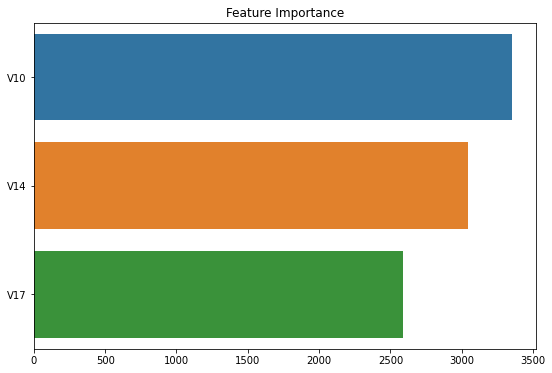

{'model_id': 'RF', 'n_estimators': 300, 'max_depth': 9, 'learning_rage': 0.5, 'Accuracy_score': 0.9993445923013002, 'Recall_score': 0.7916666666666666}


In [ ]:
res = lightGBM('RF', X, y, n_est=300, md=9, lr=0.5, visualFeature=True)
print(res)

# 6, recall_score 비교

In [ ]:
DF_res_rf.sort_values(by='Recall_score', ascending=False).head(3)

,model_id,n_estimators,max_features,max_depth,Accuracy_score,Recall_score
16,RF_3-8,300,1,9,0.999532,0.805556
15,RF_3-7,300,auto,9,0.999532,0.805556
9,RF_3-3,300,auto,None,0.999520,0.791667


In [ ]:
DF_res_lgbm.sort_values(by='Recall_score',  ascending=False).head(3)

,model_id,n_estimators,max_features,max_depth,Accuracy_score,Recall_score,learning_rage
27,LGMB_3-8,300,NaN,9,0.999345,0.791667,0.5
11,LGMB_3-9,300,NaN,9,0.999345,0.791667,0.5
29,LGMB_3-10,300,NaN,15,0.999298,0.784722,0.5


In [ ]:
Recall = 